In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#### Data Exploration

In [20]:
# Build dataframe
pd.options.display.float_format = '{:,.2f}'.format

house_data = pd.read_csv('Data/housing_data.csv')
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,"313,000.00",3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,"2,384,000.00",5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,"342,000.00",3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,"420,000.00",3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,"550,000.00",4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,"308,166.67",3.00,1.75,1510,6360,1.00,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,"534,333.33",3.00,2.50,1460,7573,2.00,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,"416,904.17",3.00,2.50,3010,7014,2.00,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,"203,400.00",4.00,2.00,2090,6630,1.00,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [22]:
#print(house_data.date.value_counts())  # drop
#print(house_data.street.value_counts()) # drop
#print(house_data.city.value_counts()) # drop
#print(house_data.statezip.value_counts()) # check, maybe drop
#print(house_data.country.value_counts()) # All USA. drop

#house_data.replace({'statezip': r'\s[0-9]*'}, '', regex=True, inplace=True)
#house_data.statezip.value_counts() # All WA. drop

# Save the city and zip in case we want to work with it later
house_city = house_data.city
house_zip = house_data.replace({'statezip': r'WA\s'}, '', regex=True).statezip


house_data.drop(columns=['date', 'street', 'city', 'statezip', 'country'], inplace=True)
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,"313,000.00",3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005
1,"2,384,000.00",5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0
2,"342,000.00",3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0
3,"420,000.00",3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0
4,"550,000.00",4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,"308,166.67",3.00,1.75,1510,6360,1.00,0,0,4,1510,0,1954,1979
4596,"534,333.33",3.00,2.50,1460,7573,2.00,0,0,3,1460,0,1983,2009
4597,"416,904.17",3.00,2.50,3010,7014,2.00,0,0,3,3010,0,2009,0
4598,"203,400.00",4.00,2.00,2090,6630,1.00,0,0,3,1070,1020,1974,0


In [23]:
## Split data into training and test data
from sklearn.model_selection import train_test_split

x = house_data.drop(['price'], axis=1)
y = house_data.price

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
train_data = x_train.join(y_train)
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
157,2.00,1.00,1030,4400,1.00,0,0,3,1030,0,1924,2011,"469,000.00"
4388,3.00,2.00,1510,7066,1.00,0,2,3,1230,280,1973,2013,"300,000.00"
4149,3.00,1.50,1010,7683,1.50,0,0,5,1010,0,1953,0,"405,000.00"
3216,3.00,1.75,2200,9840,1.00,0,0,5,1500,700,1978,0,"689,000.00"
1174,3.00,1.00,1070,6109,1.00,0,0,5,1070,0,1951,0,"337,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,4.00,3.50,3930,5680,2.00,0,1,3,2820,1110,2013,1923,"828,950.00"
2480,2.00,2.00,2280,641203,2.00,0,0,3,2280,0,1990,2009,"849,900.00"
4486,2.00,1.00,1100,8281,1.00,0,0,4,1100,0,1947,1988,"229,629.50"
1664,3.00,1.00,960,6634,1.00,0,0,3,960,0,1952,2008,"315,000.00"


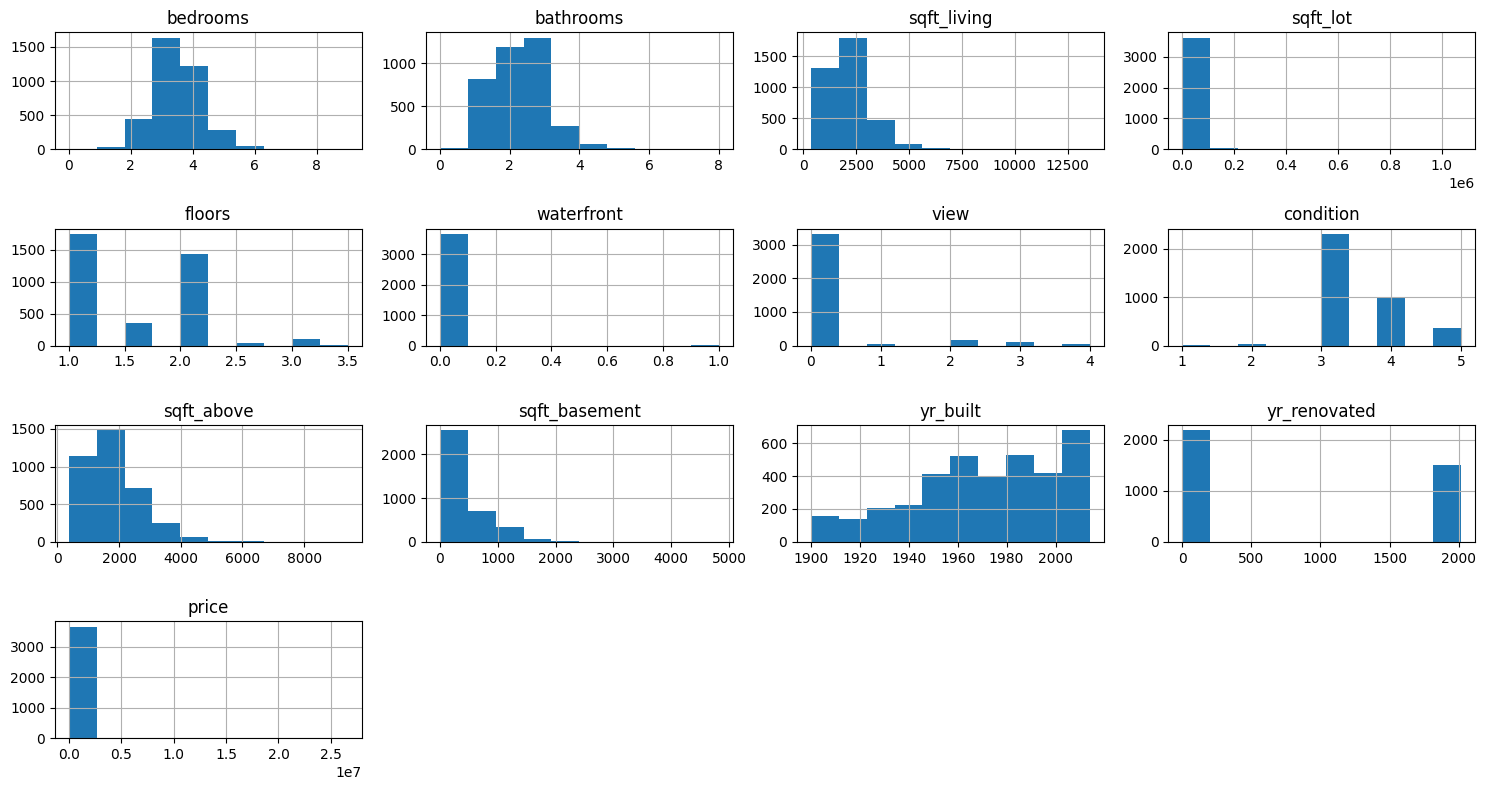

In [27]:
train_data.hist(figsize=(15, 8))
plt.tight_layout()

In [30]:
## Look at the correlation with the target variable - Heatmap to visualize the correlation matrix

train_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
bedrooms,1.00,0.55,0.60,0.06,0.18,0.01,0.13,0.04,0.49,0.34,0.13,-0.07,0.20
bathrooms,0.55,1.00,0.76,0.10,0.49,0.08,0.22,-0.11,0.69,0.31,0.45,-0.21,0.33
sqft_living,0.60,0.76,1.00,0.21,0.35,0.13,0.32,-0.06,0.88,0.46,0.28,-0.12,0.42
sqft_lot,0.06,0.10,0.21,1.00,0.01,0.02,0.07,0.01,0.21,0.05,0.04,-0.02,0.05
floors,0.18,0.49,0.35,0.01,1.00,0.02,0.02,-0.26,0.52,-0.25,0.47,-0.23,0.15
waterfront,0.01,0.08,0.13,0.02,0.02,1.00,0.35,-0.01,0.09,0.11,-0.03,0.02,0.16
view,0.13,0.22,0.32,0.07,0.02,0.35,1.00,0.06,0.18,0.34,-0.07,0.02,0.23
condition,0.04,-0.11,-0.06,0.01,-0.26,-0.01,0.06,1.00,-0.17,0.20,-0.40,-0.19,0.04
sqft_above,0.49,0.69,0.88,0.21,0.52,0.09,0.18,-0.17,1.00,-0.02,0.40,-0.16,0.36
sqft_basement,0.34,0.31,0.46,0.05,-0.25,0.11,0.34,0.20,-0.02,1.00,-0.17,0.04,0.22


<Axes: >

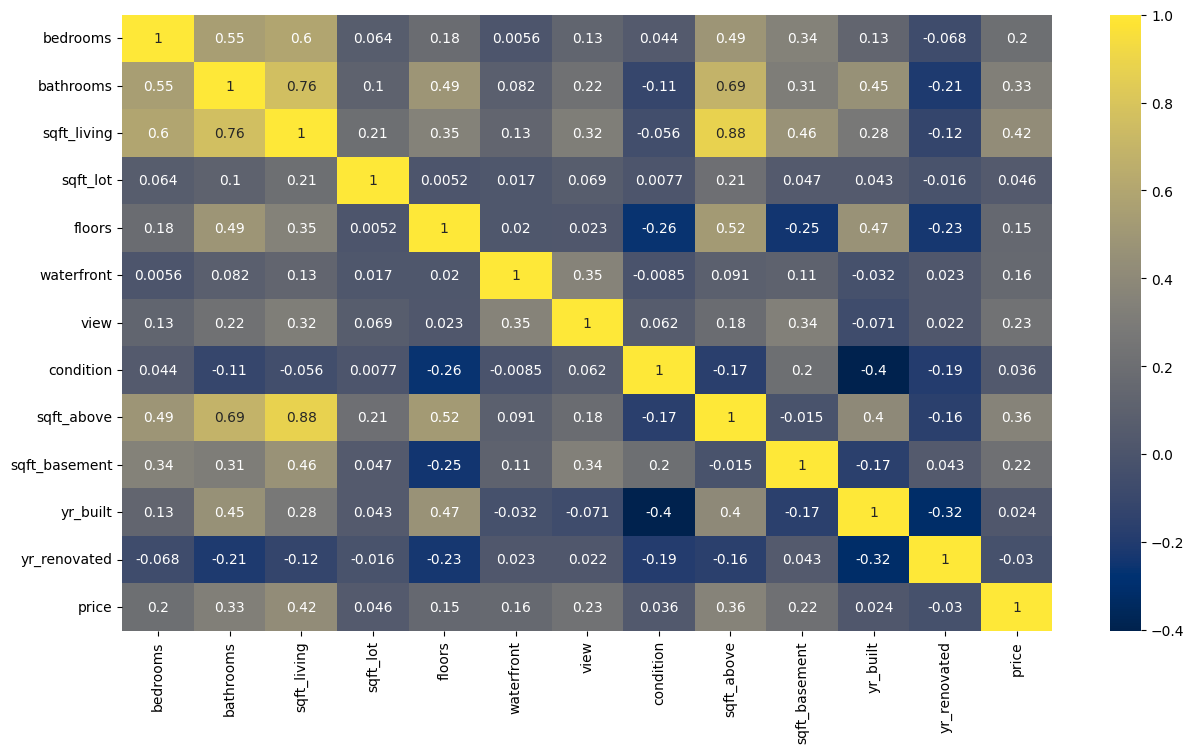

In [40]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='cividis')

# sqft_lot and sqft_living correlate strongly with the price. Same with sqft_above and condition
# yr_renovated has a negative correlation with price

In [42]:
### Data Preprocessing
# Take the logarithm of features and look at the distribution

# bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_renovated
# prev 0 values by adding 1

train_data.bathrooms = np.log(train_data.bathrooms + 1)
train_data.sqft_living = np.log(train_data.sqft_living + 1)
train_data.sqft_lot = np.log(train_data.sqft_lot + 1)
train_data.floors = np.log(train_data.floors + 1)
train_data.waterfront = np.log(train_data.waterfront + 1)
train_data.view = np.log(train_data.view + 1)
train_data.condition = np.log(train_data.condition + 1)
train_data.sqft_above = np.log(train_data.sqft_above + 1)
train_data.sqft_basement = np.log(train_data.sqft_basement + 1)
train_data.yr_renovated = np.log(train_data.yr_renovated + 1)

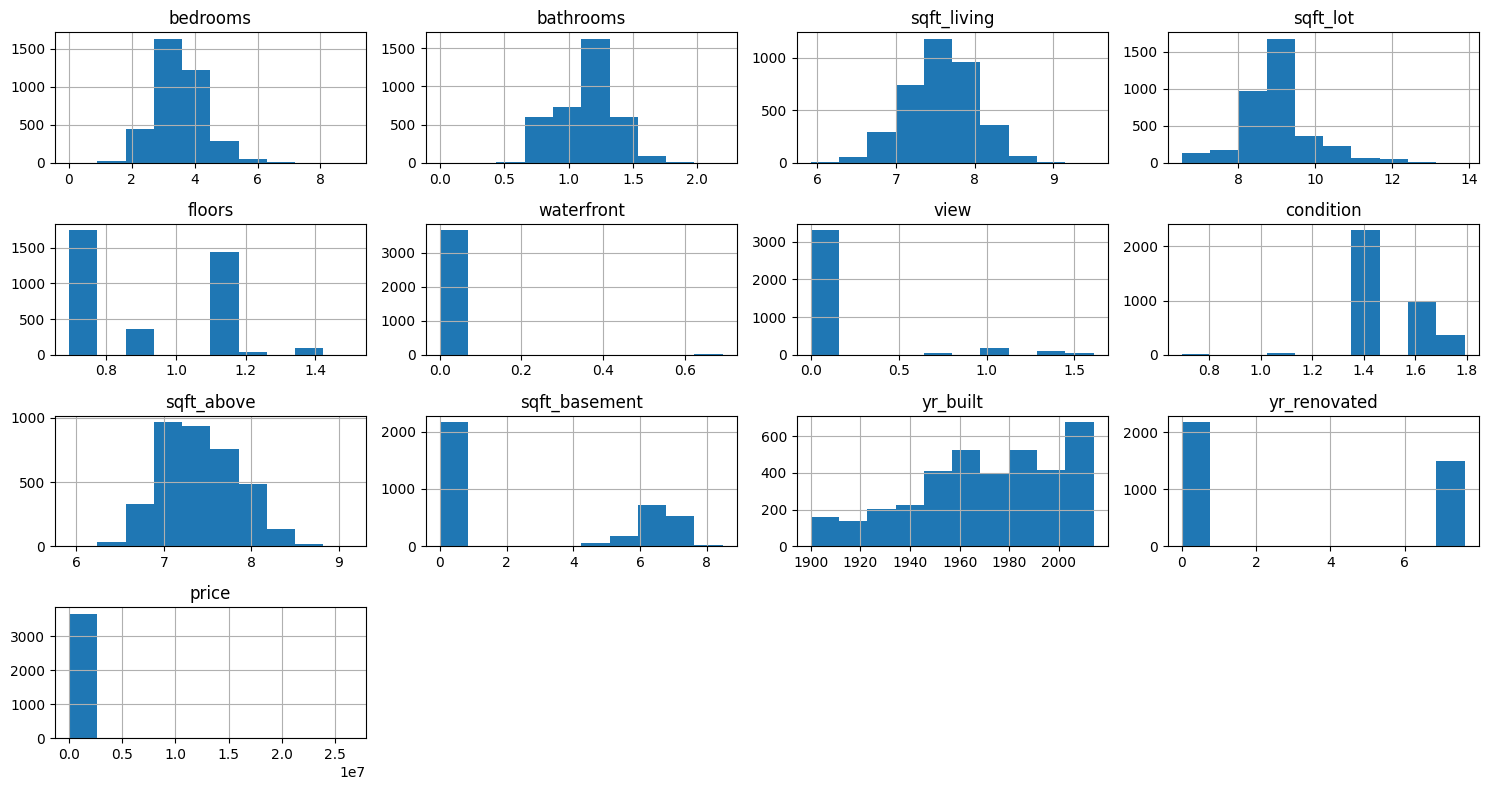

In [44]:
train_data.hist(figsize=(15, 8))
plt.tight_layout()